# Matplotlib Tutorial: Více os na jednom grafu a RC parametry

Tento notebook vysvětluje klíčové koncepty matplotlib pro vytváření komplexních vizualizací.

## Přehled klíčových metod a konceptů

| **Kategorie** | **Metoda/Koncept** | **Popis** | **Použití** |
|---------------|-------------------|-----------|-------------|
| **Subplots** | `plt.subplots()` | Vytvoří figure a pole axes objektů | `fig, axes = plt.subplots(nrows, ncols)` |
| | `plt.subplot()` | Vytvoří jednotlivý subplot | `plt.subplot(rows, cols, index)` |
| | `fig.add_subplot()` | Přidá subplot do existující figure | `ax = fig.add_subplot(111)` |
| **Axes objekty** | `ax.plot()` | Kreslí na konkrétní axes | `ax.plot(x, y)` |
| | `ax.set_title()` | Nastaví titulek pro axes | `ax.set_title("Název")` |
| | `ax.set_xlabel()` | Popisek osy X | `ax.set_xlabel("X osa")` |
| | `ax.set_ylabel()` | Popisek osy Y | `ax.set_ylabel("Y osa")` |
| **RC Parameters** | `plt.rcParams` | Slovník s globálními nastaveními | `plt.rcParams['font.size'] = 14` |
| | `plt.rc()` | Nastaví skupinu parametrů | `plt.rc('font', size=14)` |
| | `plt.rcdefaults()` | Obnoví výchozí nastavení | `plt.rcdefaults()` |
| | Context manager | Dočasné změny nastavení | `with plt.rc_context({'font.size': 16}):` |
| **Figure velikost** | `figsize` | Velikost figure v palcích | `plt.figure(figsize=(10, 6))` |
| | `dpi` | Rozlišení (dots per inch) | `plt.figure(dpi=100)` |
| **Layout** | `plt.tight_layout()` | Automaticky upraví rozložení | Po vytvoření všech subplotů |
| | `plt.subplots_adjust()` | Ruční úprava rozestupů | `plt.subplots_adjust(hspace=0.3)` |

In [1]:
# Import potřebných knihoven
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Nastavení pro lepší zobrazení v notebooku
%matplotlib inline

In [2]:
# Vytvoření testovacích dat pro všechny příklady
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.cos(x)
y4 = np.exp(-x/5) * np.sin(x)

print("Data připravena pro demonstrace")

Data připravena pro demonstrace


## Základní subplot - 2x2 mřížka

Nejjednodušší způsob vytvoření více grafů na jednom obrázku.

In [3]:
import numpy as np                    # Pro matematické funkce a pole čísel
from matplotlib import pyplot as plt   # Pro kreslení grafů
import math                            # Pro matematické konstanty (pi, e)

# ----- PŘÍPRAVA METEOROLOGICKÝCH DAT -----
# Vytvoření jednoduchých ukázkových dat místo složitých výpočtů
dny = [1, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]  # Středy měsíců
mesice = ['Led', 'Úno', 'Bře', 'Dub', 'Kvě', 'Čer', 
          'Čvc', 'Srp', 'Zář', 'Říj', 'Lis', 'Pro']

# Teploty pro jednotlivé měsíce v °C (typické pro střední Evropu)
teploty = [-2, 1, 6, 12, 17, 20, 22, 21, 17, 11, 5, 0]
# Nejchladněji v lednu (-2°C), nejtepljeji v červenci (22°C)

# Atmosférický tlak v hPa (hektopascalech)
tlak = [1018, 1015, 1012, 1010, 1008, 1005, 1003, 1006, 1010, 1015, 1020, 1022]
# Vyšší tlak v zimě (1022 hPa), nižší v létě (1003 hPa)

# Relativní vlhkost vzduchu v procentech
vlhkost = [85, 80, 70, 65, 60, 55, 50, 55, 65, 75, 85, 90]
# Vyšší vlhkost v zimě (až 90%), nižší v létě (50%)

# Rychlost větru v km/h
vitr = [12, 10, 9, 7, 6, 5, 4, 5, 7, 9, 11, 13]
# Více větru v zimě (13 km/h), méně v létě (4 km/h)

# ----- VYTVOŘENÍ 2×2 MŘÍŽKY SUBPLOTŮ -----
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# plt.subplots(2, 2) vytvoří mřížku 2 řádky × 2 sloupce = 4 grafy
# figsize=(12, 8) nastaví velikost celého obrázku na 12×8 palců
# axes je 2D pole pro přístup k jednotlivým grafům

# ----- PRVNÍ SUBPLOT (HORNÍ LEVÝ) - TEPLOTY -----
# Indexování [řádek, sloupec] - [0,0] = první řádek, první sloupec
axes[0, 0].plot(dny, teploty, 'ro-', linewidth=2, markersize=6)    # 'ro-' = červené kroužky s čárou
axes[0, 0].set_title('Teploty během roku')             # Titulek grafu
axes[0, 0].set_xlabel('Měsíc')                        # Popisek osy X
axes[0, 0].set_ylabel('Teplota (°C)')                 # Popisek osy Y s jednotkami
axes[0, 0].grid(True, alpha=0.3)                      # Mřížka s 30% průhledností
axes[0, 0].axhline(y=0, color='blue', linestyle='--', alpha=0.5)  # Čára pro bod mrazu (0°C)
axes[0, 0].set_xticks(dny[::2])                       # Značky každý druhý měsíc
axes[0, 0].set_xticklabels(mesice[::2], rotation=45)   # Názvy měsíců otočené o 45°

# ----- DRUHÝ SUBPLOT (HORNÍ PRAVÝ) - ATMOSFÉRICKÝ TLAK -----
axes[0, 1].plot(dny, tlak, 'go-', linewidth=2, markersize=6)       # 'go-' = zelené kroužky s čárou
axes[0, 1].set_title('Atmosférický tlak')
axes[0, 1].set_xlabel('Měsíc')
axes[0, 1].set_ylabel('Tlak (hPa)')                   # hPa = hektopascaly
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(y=1013, color='red', linestyle='--', alpha=0.5)  # Normální tlak (1013 hPa)
axes[0, 1].set_xticks(dny[::2])
axes[0, 1].set_xticklabels(mesice[::2], rotation=45)

# ----- TŘETÍ SUBPLOT (DOLNÍ LEVÝ) - RELATIVNÍ VLHKOST -----
axes[1, 0].plot(dny, vlhkost, 'bo-', linewidth=2, markersize=6)    # 'bo-' = modré kroužky s čárou
axes[1, 0].set_title('Relativní vlhkost vzduchu')
axes[1, 0].set_xlabel('Měsíc')
axes[1, 0].set_ylabel('Vlhkost (%)')                  # Procenta vlhkosti
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim(0, 100)                          # Vlhkost je mezi 0-100%
axes[1, 0].set_xticks(dny[::2])
axes[1, 0].set_xticklabels(mesice[::2], rotation=45)

# ----- ČTVRTÝ SUBPLOT (DOLNÍ PRAVÝ) - RYCHLOST VĚTRU -----
axes[1, 1].plot(dny, vitr, 'o-', color='orange', linewidth=2, markersize=6)   # Oranžové kroužky
axes[1, 1].set_title('Rychlost větru')
axes[1, 1].set_xlabel('Měsíc')
axes[1, 1].set_ylabel('Rychlost (km/h)')              # Jednotky rychlosti
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_ylim(0, None)                         # Rychlost začíná od 0
axes[1, 1].set_xticks(dny[::2])                      # Značky každý druhý měsíc
axes[1, 1].set_xticklabels(mesice[::2], rotation=45) # Názvy měsíců

# ----- DOKONČENÍ A ZOBRAZENÍ -----
plt.tight_layout()                                    # Automaticky upraví rozestupy mezi grafy
                                                     # Zabrání překrývání titulků a popisků
plt.show()                                           # Zobraz všechny 4 grafy najednou

# Shrnutí - indexování subplotů:
# axes[0, 0] = horní levý (teploty)     axes[0, 1] = horní pravý (tlak)
# axes[1, 0] = dolní levý (vlhkost)     axes[1, 1] = dolní pravý (vítr)
# Styly čar: 'ro-'=červené kroužky, 'go-'=zelené kroužky, 'bo-'=modré kroužky
# Referenční čáry (axhline) pomáhají interpretovat data
# Konkrétní hodnoty jsou jasně viditelné v seznamech dat

## Různé velikosti subplotů pomocí GridSpec

GridSpec umožňuje vytvářet komplexnější layouts s různými velikostmi subplotů.

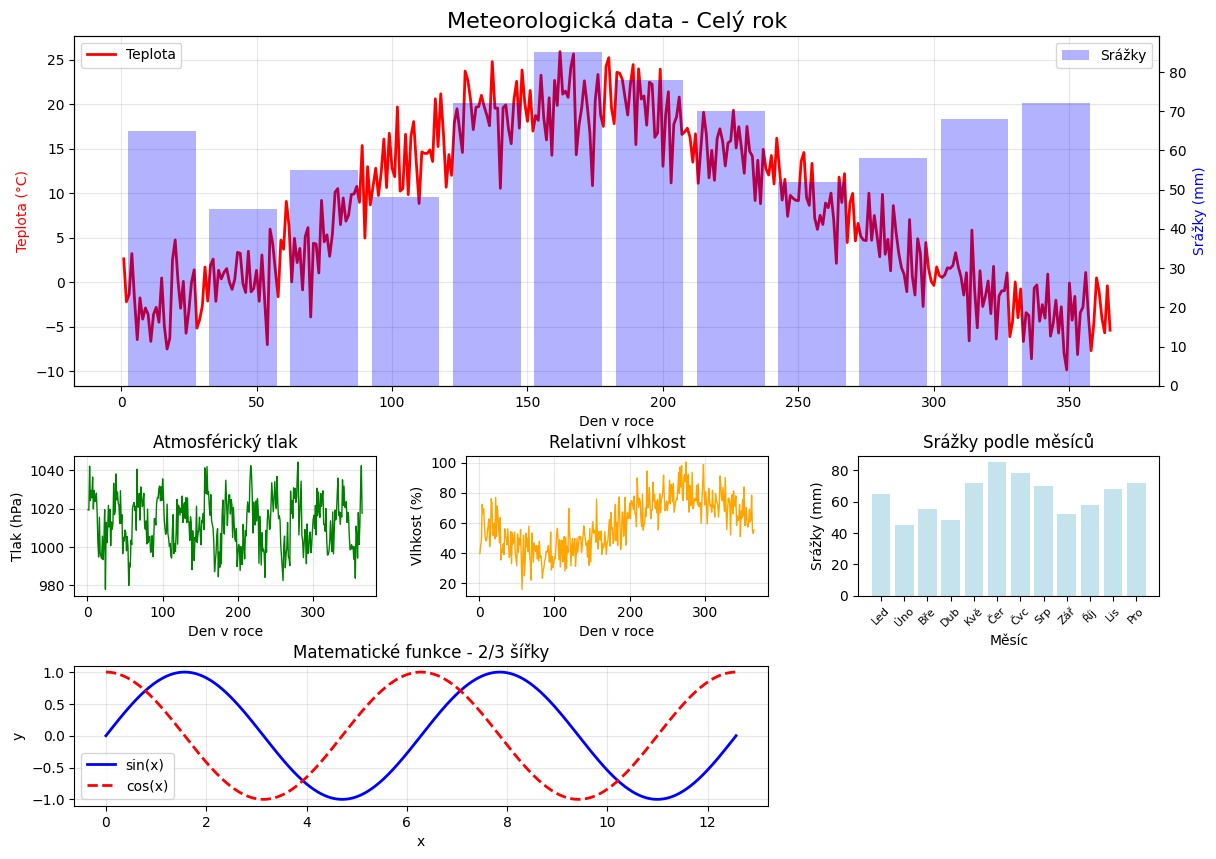

In [4]:
import numpy as np                           # Pro matematické funkce a náhodná čísla
from matplotlib import pyplot as plt          # Pro kreslení grafů
from matplotlib import gridspec               # Pro pokročilé rozložení grafů
import math                                   # Pro matematické konstanty

# ----- PŘÍPRAVA METEOROLOGICKÝCH DAT -----
# Vytvoření realistických meteorologických dat pro celý rok
dny = np.arange(1, 366)                      # Dny v roce 1-365
mesice = ['Led', 'Úno', 'Bře', 'Dub', 'Kvě', 'Čer', 
          'Čvc', 'Srp', 'Zář', 'Říj', 'Lis', 'Pro']

# Simulace teplot - sinusová křivka s náhodnými výkyvy
teploty = 8 + 12 * np.sin(2 * math.pi * (dny - 80) / 365) + np.random.normal(0, 3, 365)
# 8°C průměr + 12°C amplituda + náhodný šum ±3°C

# Srážky s vyšší pravděpodobností v zimě a na jaře
srazky_mesicni = [65, 45, 55, 48, 72, 85, 78, 70, 52, 58, 68, 72]  # mm za měsíc (12 hodnot)
tlak = 1013 + 15 * np.sin(2 * math.pi * dny / 30) + np.random.normal(0, 8, 365)  # hPa
vlhkost = 60 + 20 * np.sin(2 * math.pi * (dny + 180) / 365) + np.random.normal(0, 10, 365)  # %

# Matematické funkce pro ukázku
x = np.linspace(0, 4*math.pi, 1000)         
y1 = np.sin(x)                              
y2 = np.cos(x)                              

# ----- VYTVOŘENÍ VLASTNÍ MŘÍŽKY 4×3 -----
fig = plt.figure(figsize=(14, 10))           # Větší obrázek pro více grafů
                                            
# Definice pokročilé mřížky 4×3 s nastavitelnými rozestupy
gs = gridspec.GridSpec(4, 3,                # Mřížka 4 řádky × 3 sloupce
                      hspace=0.5,           # Větší vertikální mezery (50%) - zabrání překrývání
                      wspace=0.3)           # Horizontální mezery (30%)

# ----- VELKÝ HLAVNÍ GRAF (HORNÍ ČÁST - 2 ŘÁDKY) -----
# gs[0:2, :] = řádky 0-1, všechny sloupce (0, 1, 2)
ax1 = fig.add_subplot(gs[0:2, :])          # Graf spanning přes 2×3 = 6 políček
ax1.plot(dny, teploty, 'r-', linewidth=2, label='Teplota')
ax1_twin = ax1.twinx()                      # Druhá osa Y pro srážky
# Vytvoření pozic pro měsíční sloupce (středy měsíců)
mesice_pozice = [15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]  # Středy měsíců
ax1_twin.bar(mesice_pozice, srazky_mesicni, width=25, alpha=0.3, color='blue', label='Srážky')
ax1.set_title('Meteorologická data - Celý rok', fontsize=16)
ax1.set_xlabel('Den v roce')
ax1.set_ylabel('Teplota (°C)', color='red')
ax1_twin.set_ylabel('Srážky (mm)', color='blue')
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# ----- STŘEDNÍ ŘÁDEK - TŘI MALÉ GRAFY -----
# Levý graf - řádek 2, sloupec 0
ax2 = fig.add_subplot(gs[2, 0])            # gs[řádek, sloupec] = gs[2, 0]
ax2.plot(dny, tlak, 'g-', linewidth=1)     # Zelená čára, tenčí než hlavní graf
ax2.set_title('Atmosférický tlak')         # Titulek grafu
ax2.set_ylabel('Tlak (hPa)')               # Jednotky hektopascaly
ax2.set_xlabel('Den v roce')               # Popisek osy X
ax2.grid(True, alpha=0.3)                  # Průhledná mřížka 30%

# Prostřední graf - řádek 2, sloupec 1  
ax3 = fig.add_subplot(gs[2, 1])            # gs[2, 1] = střední pozice
ax3.plot(dny, vlhkost, 'orange', linewidth=1)  # Oranžová barva
ax3.set_title('Relativní vlhkost')         # Vlhkost vzduchu v procentech
ax3.set_ylabel('Vlhkost (%)')              # Jednotky procenta
ax3.set_xlabel('Den v roce')               # Popisek osy X
ax3.grid(True, alpha=0.3)                  # Mřížka pro snadnější čtení hodnot

# Pravý graf - řádek 2, sloupec 2
ax4 = fig.add_subplot(gs[2, 2])            # gs[2, 2] = pravá pozice
# Histogram měsíčních srážek - sloupcový graf
ax4.bar(range(12),                         # X pozice 0,1,2...11 pro 12 měsíců
        srazky_mesicni,                    # Výška sloupců = hodnoty srážek
        color='lightblue',                 # Světle modrá barva
        alpha=0.7)                        # 70% průhlednost
ax4.set_title('Srážky podle měsíců')       # Titulek histogramu
ax4.set_ylabel('Srážky (mm)')              # Jednotky milimetry
ax4.set_xlabel('Měsíc')                    # Popisek osy X
ax4.set_xticks(range(12))                  # Pozice značek na ose X (0-11)
ax4.set_xticklabels(mesice,                # Názvy měsíců místo čísel
                   rotation=45,            # Otočení o 45° kvůli úspoře místa
                   fontsize=8)             # Menší font kvůli omezenému prostoru

# ----- SPODNÍ ŘÁDEK - GRAF NA 2/3 ŠÍŘKY + PRÁZDNÉ MÍSTO -----
# gs[3, 0:2] = řádek 3, sloupce 0-1 (2 ze 3 sloupců = 2/3 šířky)
ax5 = fig.add_subplot(gs[3, 0:2])          # Graf spanning přes 2 sloupce ze 3
ax5.plot(x, y1, 'b-',                      # Modrá plná čára
         linewidth=2,                      # Tloušťka čáry 2 pixely
         label='sin(x)')                   # Text pro legendu
ax5.plot(x, y2, 'r--',                     # Červená přerušovaná čára
         linewidth=2,                      # Stejná tloušťka
         label='cos(x)')                   # Text pro legendu
ax5.set_title('Matematické funkce - 2/3 šířky')  # Titulek s informací o šířce
ax5.set_xlabel('x')                        # Popisek osy X
ax5.set_ylabel('y')                        # Popisek osy Y
ax5.legend()                               # Zobraz legendu s popisky funkcí
ax5.grid(True, alpha=0.3)                  # Průhledná mřížka pro snadnější čtení

# gs[3, 2] záměrně vynecháváme - vytvoří prázdné místo vpravo
# Žádný fig.add_subplot(gs[3, 2]) = prázdné políčko
# Prázdné místo může být užitečné pro poznámky, budoucí obsah nebo jen vizuální odpočinek

# ----- ZOBRAZENÍ HOTOVÉHO ROZLOŽENÍ -----
plt.show()                                 

# Shrnutí rozložení:
# Řádek 0-1: Hlavní graf (3/3 šířky) - meteorologická data
# Řádek 2: Tři malé grafy (každý 1/3 šířky) - tlak, vlhkost, srážky
# Řádek 3: Graf na 2/3 šířky + PRÁZDNÉ MÍSTO (1/3 šířky)
# Prázdné místo = prostě nevytvoříš subplot pro dané gs[řádek, sloupec]

## RC Parameters - Globální nastavení stylu

RC parametry umožňují nastavit globální styl pro všechny grafy.

In [5]:
# Uložení původních nastavení pro pozdější obnovení
original_params = plt.rcParams.copy()

# Zobrazení některých aktuálních hodnot
print("Původní nastavení:")
print(f"Font size: {plt.rcParams['font.size']}")
print(f"Figure size: {plt.rcParams['figure.figsize']}")
print(f"Line width: {plt.rcParams['lines.linewidth']}")

Původní nastavení:
Font size: 10.0
Figure size: [6.4, 4.8]
Line width: 1.5


In [6]:
# Nastavení vlastního stylu pomocí rc parametrů
plt.rcParams.update({
    'font.size': 14,           # Základní velikost fontu
    'font.family': 'serif',    # Typ fontu (serif, sans-serif, monospace)
    'axes.titlesize': 16,      # Velikost titulků os
    'axes.labelsize': 12,      # Velikost popisků os
    'xtick.labelsize': 10,     # Velikost čísel na ose X
    'ytick.labelsize': 10,     # Velikost čísel na ose Y
    'legend.fontsize': 11,     # Velikost fontu v legendě
    'figure.figsize': (10, 6), # Výchozí velikost obrázku
    'lines.linewidth': 2,      # Výchozí tloušťka čar
    'axes.grid': True,         # Automaticky zobrazit mřížku
    'grid.alpha': 0.3,         # Průhlednost mřížky
    'axes.spines.top': False,  # Skrýt horní hranici
    'axes.spines.right': False # Skrýt pravou hranici
})

print("Nová nastavení aplikována!")

Nová nastavení aplikována!


In [7]:
import numpy as np                    # Pro matematické funkce a pole čísel
from matplotlib import pyplot as plt   # Pro kreslení grafů

# ----- PŘÍPRAVA METEOROLOGICKÝCH DAT -----
# Měsíce v roce pro osu X
mesice = ['Led', 'Úno', 'Bře', 'Dub', 'Kvě', 'Čer', 
          'Čvc', 'Srp', 'Zář', 'Říj', 'Lis', 'Pro']
mesice_cisla = list(range(1, 13))     # Čísla měsíců 1, 2, 3, ..., 12 pro vykreslení

# Průměrné teploty v České republice během roku (°C)
teploty = [-2, 1, 6, 12, 17, 20, 22, 21, 17, 11, 5, 0]
# Nejchladněji v lednu (-2°C), nejtepljeji v červenci (22°C)

# Průměrné srážky v České republice během roku (mm za měsíc)  
srazky = [45, 38, 42, 55, 68, 85, 90, 78, 65, 52, 48, 41]
# Více srážek v létě (až 90mm), méně v zimě (kolem 40mm)

# Data pro bodový graf - vztah mezi teplotou a spotřebou energie
# Konkrétní hodnoty pro demonstraci korelace
teploty_dny = [-5, -3, -1, 2, 5, 8, 12, 15, 18, 22, 25, 20, 16, 10, 6, 1, -2, -4]
# Teploty pro různé dny v roce (°C)

spotreba_energie = [85, 80, 75, 70, 60, 50, 35, 25, 15, 8, 5, 10, 20, 45, 55, 70, 75, 82]
# Spotřeba energie na vytápění (kWh za den)
# Vyšší spotřeba při nižších teplotách - logická závislost

# ----- VYTVOŘENÍ GRAFU S NOVÝM STYLEM -----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# plt.subplots(1, 2) vytvoří 1 řádek, 2 sloupce = 2 grafy vedle sebe
# figsize=(12, 5) = širší formát pro dva grafy vedle sebe

# ----- PRVNÍ GRAF - ČÁROVÝ GRAF METEOROLOGICKÝCH DAT -----
axes[0].plot(mesice_cisla, teploty,    # X = čísla měsíců, Y = teploty
            label='Teplota (°C)',      # Text pro legendu
            marker='o',                # Kroužky na datových bodech
            linewidth=2,               # Tloušťka čáry
            color='red')               # Červená barva pro teploty

axes[0].plot(mesice_cisla, srazky,     # X = čísla měsíců, Y = srážky  
            label='Srážky (mm)',       # Text pro legendu
            marker='s',                # Čtverce na datových bodech
            linewidth=2,               # Tloušťka čáry
            color='blue')              # Modrá barva pro srážky

axes[0].set_title('Klimatické podmínky během roku')  # Titulek grafu
axes[0].set_xlabel('Měsíc')                         # Popisek osy X
axes[0].set_ylabel('Hodnota')                       # Popisek osy Y
axes[0].legend()                                    # Zobraz legendu s popisky
axes[0].grid(True, alpha=0.3)                       # Mřížka s 30% průhledností
axes[0].set_xticks(mesice_cisla)                    # Pozice značek na ose X
axes[0].set_xticklabels(mesice, rotation=45)        # Názvy měsíců otočené o 45°

# ----- DRUHÝ GRAF - BODOVÝ GRAF (SCATTER PLOT) -----
# Zobrazení vztahu mezi teplotou a spotřebou energie
axes[1].scatter(teploty_dny,           # X = teploty jednotlivých dní
               spotreba_energie,       # Y = spotřeba energie
               alpha=0.7,              # 70% průhlednost bodů
               color='orange',         # Oranžová barva bodů
               s=50,                   # Velikost bodů (50 pixelů)
               edgecolors='black',     # Černý okraj kolem bodů
               linewidth=0.5)          # Tloušťka okraje

axes[1].set_title('Závislost spotřeby energie na teplotě')  # Titulek grafu
axes[1].set_xlabel('Teplota (°C)')                         # Popisek osy X
axes[1].set_ylabel('Spotřeba energie (kWh/den)')           # Popisek osy Y s jednotkami
axes[1].grid(True, alpha=0.3)                              # Mřížka pro snadnější čtení

# Přidání trendové čáry pro lepší vizualizaci korelace
# np.polyfit() najde nejlepší přímku procházející body
z = np.polyfit(teploty_dny, spotreba_energie, 1)  # Lineární regrese (stupeň 1)
p = np.poly1d(z)                                  # Vytvoří funkci z koeficientů
axes[1].plot(sorted(teploty_dny),                 # X = seřazené teploty
            p(sorted(teploty_dny)),               # Y = hodnoty na trendové čáře
            'r--',                                # Červená přerušovaná čára
            alpha=0.8,                            # 80% průhlednost
            linewidth=2,                          # Tloušťka čáry
            label='Trend')                        # Text pro legendu
axes[1].legend()                                  # Zobraz legendu

# ----- DOKONČENÍ A ZOBRAZENÍ -----
plt.tight_layout()                               # Automaticky upraví rozestupy mezi grafy
                                                # Zabrání překrývání popisků
plt.show()                                      # Zobraz oba grafy vedle sebe

# Shrnutí - typy grafů:
# Čárový graf (plot) = vhodný pro zobrazení trendů v čase (teploty, srážky)
# Bodový graf (scatter) = vhodný pro zobrazení vztahů mezi dvěma proměnnými
# Konkrétní hodnoty jsou jasně viditelné v seznamech - snadné pro experimentování

In [8]:
# Obnovení původních nastavení
plt.rcParams.update(original_params)
print("Původní nastavení obnovena")
print(f"Font size je opět: {plt.rcParams['font.size']}")

Původní nastavení obnovena
Font size je opět: 10.0


## Context manager pro dočasné změny stylu

Context manager umožňuje dočasné změny bez ovlivnění globálních nastavení.

Velikost fontu před context managerem: 10.0
Tloušťka čar před context managerem: 1.5
Velikost obrázku před context managerem: [6.4, 4.8]


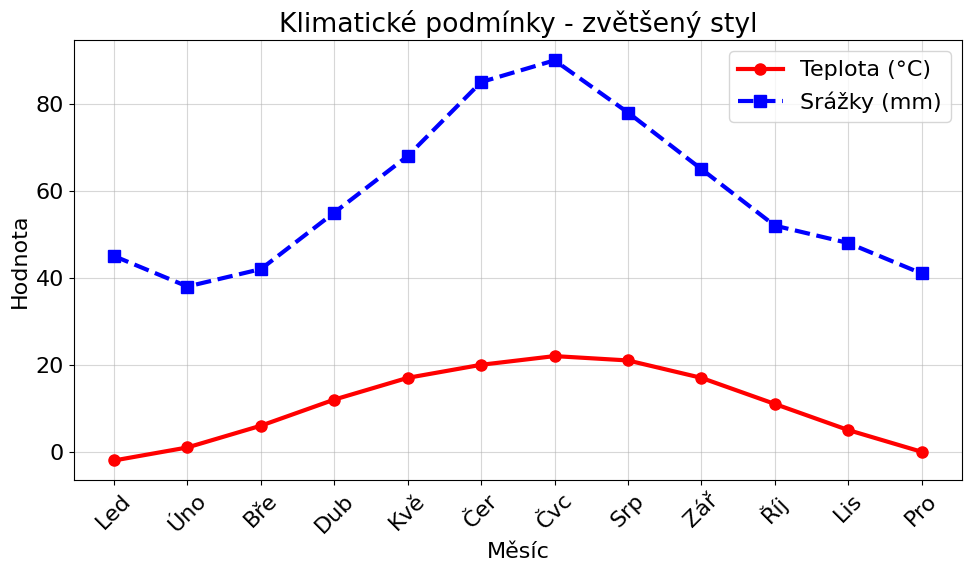

\nUvnitř context manageru:
Velikost fontu: 16.0
Tloušťka čar: 3.0
Velikost obrázku: [10.0, 6.0]
Průhlednost mřížky: 0.5


In [9]:
import numpy as np                    # Pro matematické funkce a pole čísel
from matplotlib import pyplot as plt   # Pro kreslení grafů

# ----- PŘÍPRAVA METEOROLOGICKÝCH DAT -----
# Měsíce v roce pro osu X
mesice = ['Led', 'Úno', 'Bře', 'Dub', 'Kvě', 'Čer', 
          'Čvc', 'Srp', 'Zář', 'Říj', 'Lis', 'Pro']
mesice_cisla = list(range(1, 13))     # Čísla měsíců 1, 2, 3, ..., 12 pro vykreslení

# Průměrné teploty v České republice během roku (°C)
teploty = [-2, 1, 6, 12, 17, 20, 22, 21, 17, 11, 5, 0]
# Nejchladněji v lednu (-2°C), nejtepljeji v červenci (22°C)

# Průměrné srážky v České republice během roku (mm za měsíc)  
srazky = [45, 38, 42, 55, 68, 85, 90, 78, 65, 52, 48, 41]
# Více srážek v létě (až 90mm), méně v zimě (kolem 40mm)

# ----- KONTROLA AKTUÁLNÍCH NASTAVENÍ MATPLOTLIB -----
# Zobrazení aktuální velikosti fontu před změnami
print(f"Velikost fontu před context managerem: {plt.rcParams['font.size']}")
# plt.rcParams = slovník se všemi nastaveními matplotlib
# 'font.size' = výchozí velikost písma v bodech

print(f"Tloušťka čar před context managerem: {plt.rcParams['lines.linewidth']}")
# 'lines.linewidth' = výchozí tloušťka všech čar v grafech

print(f"Velikost obrázku před context managerem: {plt.rcParams['figure.figsize']}")
# 'figure.figsize' = výchozí velikost obrázku v palcích (šířka, výška)

# ----- UKÁZKA CONTEXT MANAGERU PRO DOČASNÉ ZMĚNY -----
# Context manager umožňuje dočasně změnit nastavení jen pro jeden graf
with plt.rc_context({'font.size': 16,           # Větší font pro lepší čitelnost
                     'lines.linewidth': 3,      # Tlustší čáry pro lepší viditelnost  
                     'figure.figsize': (10, 6), # Větší obrázek (10×6 palců)
                     'grid.alpha': 0.5}):       # Více viditelná mřížka

    plt.figure()                               # Vytvoř nový obrázek s novým nastavením
    
    # Vykreslení meteorologických dat s novým stylem
    plt.plot(mesice_cisla, teploty,           # X = čísla měsíců, Y = teploty
            'r-',                             # Červená plná čára
            marker='o',                       # Kroužky na datových bodech
            markersize=8,                     # Velikost kroužků
            label='Teplota (°C)')             # Text pro legendu
    
    plt.plot(mesice_cisla, srazky,            # X = čísla měsíců, Y = srážky
            'b--',                            # Modrá přerušovaná čára
            marker='s',                       # Čtverce na datových bodech
            markersize=8,                     # Velikost čtverců
            label='Srážky (mm)')              # Text pro legendu
    
    # Nastavení popisků a stylu grafu
    plt.title('Klimatické podmínky - zvětšený styl')  # Titulek grafu
    plt.xlabel('Měsíc')                              # Popisek osy X
    plt.ylabel('Hodnota')                            # Popisek osy Y
    plt.legend()                                     # Zobraz legendu s popisky
    plt.grid(True)                                   # Mřížka (alpha se bere z rc_context)
    
    # Nastavení popisků měsíců na ose X
    plt.xticks(mesice_cisla,                         # Pozice značek
              mesice,                               # Názvy měsíců
              rotation=45)                          # Otočení o 45° kvůli úspoře místa
    
    plt.tight_layout()                               # Upraví rozložení pro lepší vzhled
    plt.show()                                       # Zobraz graf s novým stylem
    
    # ----- KONTROLA NASTAVENÍ UVNITŘ CONTEXT MANAGERU -----
    print(f"\\nUvnitř context manageru:")
    print(f"Velikost fontu: {plt.rcParams['font.size']}")          # Měla by být 16
    print(f"Tloušťka čar: {plt.rcParams['lines.linewidth']}")      # Měla by být 3  
    print(f"Velikost obrázku: {plt.rcParams['figure.figsize']}")   # Měla by být (10, 6)
    print(f"Průhlednost mřížky: {plt.rcParams['grid.alpha']}")     # Měla

## Užitečné tipy pro praxi

1. **Vždy používejte `tight_layout()`** na konci pro lepší rozložení
2. **RC parametry nastavujte na začátku** skriptu pro konzistentní styl
3. **Pro publikace používejte větší `figsize`** a vyšší `dpi` (např. 300)
4. **Kombinujte různé typy grafů** pro lepší prezentaci dat
5. **Používejte `alpha` parametr** pro průhlednost a lepší vizuální efekty
6. **Context manager je ideální** pro jednorázové změny stylu
7. **GridSpec umožňuje vytváření** velmi komplexních layoutů